# Лабораторная работа 3.

In [40]:
import pandas as pd
df = pd.read_csv("./datasets/var2/2020/heart_2020_cleaned.csv")
print(df.columns)

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')


#### Бизнес-цели:
- Разработка персонализированных программ профилактики сердечно-сосудистых заболеваний. Цель технического проекта: создание модели машинного обучения, которая будет прогнозировать риск сердечного приступа для каждого пациента на основе его индивидуальных факторов риска, и разработка онлайн-платформы или приложения для предоставления персонализированных рекомендаций по профилактике.
- Улучшение качества медицинской Цель технического проекта: использование данных для выявления групп населения с наибольшим риском сердечного приступа и разработки целевых программ профилактики и раннего выявления заболеваний.

#### Выполним разбиение на 3 выборки: обучающую, контрольную и тестовую

In [41]:
from sklearn.model_selection import train_test_split

df = pd.read_csv("./datasets/var2/2020/heart_2020_cleaned.csv")

# Разделение на обучающую и тестовую выборки (например, 70% обучающая, 30% тестовая)
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

# Разделение обучающей выборки на обучающую и контрольную (например, 70% обучающая, 30% контрольная)
train_df, val_df = train_test_split(train_df, test_size=0.3, random_state=42)

# Вывод размеров выборок
print("Размер обучающей выборки:", len(train_df))
print("Размер контрольной выборки:", len(val_df))
print("Размер тестовой выборки:", len(test_df))


Размер обучающей выборки: 156699
Размер контрольной выборки: 67157
Размер тестовой выборки: 95939


Распределение классов в HeartDisease:
HeartDisease
No     292422
Yes     27373
Name: count, dtype: int64


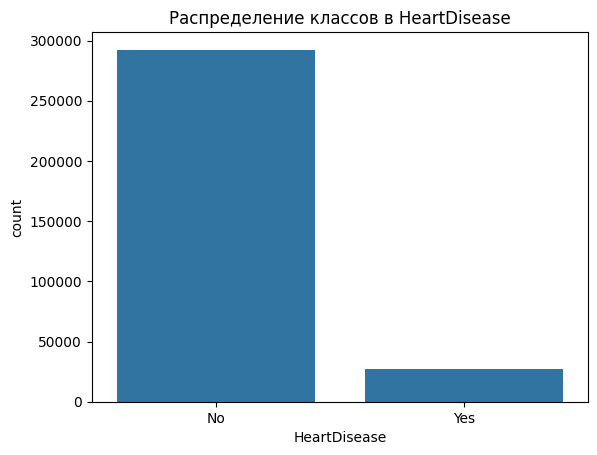

Распределение классов в Обучающей выборке:
HeartDisease
No     143331
Yes     13368
Name: count, dtype: int64


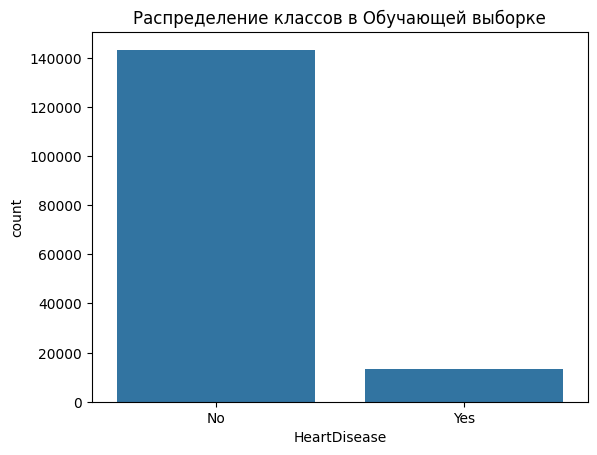

Распределение классов в Контрольной выборке:
HeartDisease
No     61442
Yes     5715
Name: count, dtype: int64


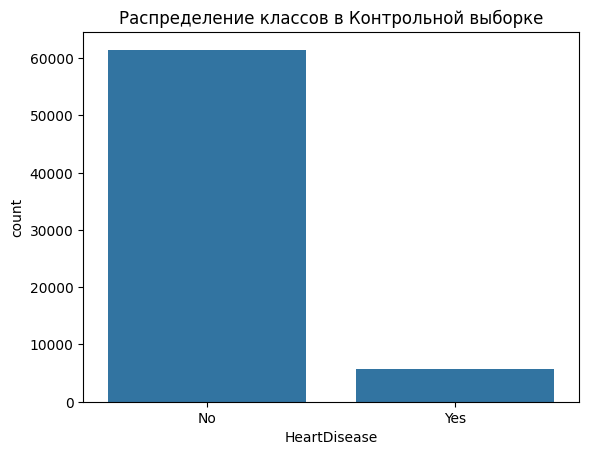

Распределение классов в Тестовой выборке:
HeartDisease
No     87649
Yes     8290
Name: count, dtype: int64


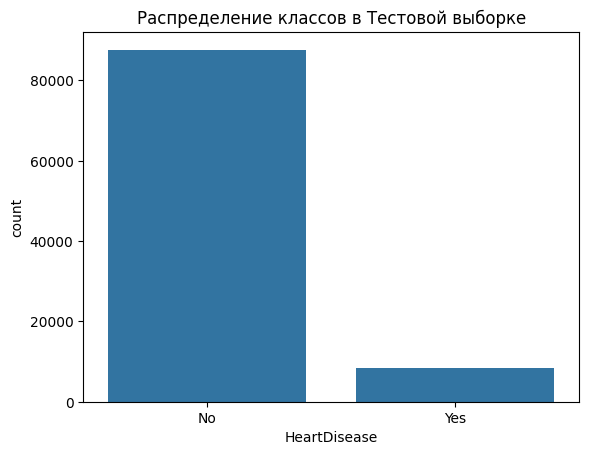

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Проверка распределения классов в целевой переменной
class_distribution = df['HeartDisease'].value_counts()
print("Распределение классов в HeartDisease:")
print(class_distribution)

# Визуализация распределения классов
sns.countplot(x='HeartDisease', data=df)
plt.title('Распределение классов в HeartDisease')
plt.show()

# Проверка сбалансированности для каждой выборки
def check_balance(df, title):
    class_distribution = df['HeartDisease'].value_counts()
    print(f"Распределение классов в {title}:")
    print(class_distribution)
    sns.countplot(x='HeartDisease', data=df)
    plt.title(f'Распределение классов в {title}')
    plt.show()

# Проверка сбалансированности для обучающей, контрольной и тестовой выборок
check_balance(train_df, 'Обучающей выборке')
check_balance(val_df, 'Контрольной выборке')
check_balance(test_df, 'Тестовой выборке')

Можно заметить, что данные не сбалансированы - во всех выборках количество значений "No" превышает "Yes" в среднем в 10 раз. Для балансировки данных будет применен метод upsampling

In [43]:
from imblearn.over_sampling import RandomOverSampler

# Функция для проверки балансировки данных
def check_balance(df, title):
    class_distribution = df['HeartDisease'].value_counts()
    print(f"\nРаспределение классов в {title}:")
    for cls, count in class_distribution.items():
        print(f"Класс {cls}: {count} ({count / len(df) * 100:.2f}%)")

# Проверка балансировки для всего датасета
check_balance(df, 'всем датасете')

# Проверка балансировки для обучающей выборки до upsampling
check_balance(train_df, 'Обучающей выборке до upsampling')

# Применение upsampling к обучающей выборке
X_train = train_df.drop('HeartDisease', axis=1)  # Отделяем признаки от целевой переменной
y_train = train_df['HeartDisease']  # Целевая переменная

# Инициализация RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Применение upsampling
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Создание нового DataFrame с балансированными данными
train_df_resampled = pd.concat([X_train_resampled, y_train_resampled], axis=1)

# Вывод размеров выборок после upsampling
print("Размер обучающей выборки после upsampling:", len(train_df_resampled))

# Проверка балансировки для обучающей выборки после upsampling
check_balance(train_df_resampled, 'Обучающей выборке после upsampling')

# Проверка балансировки для контрольной и тестовой выборок (они не должны измениться)
check_balance(val_df, 'Контрольной выборке')
check_balance(test_df, 'Тестовой выборке')


Распределение классов в всем датасете:
Класс No: 292422 (91.44%)
Класс Yes: 27373 (8.56%)

Распределение классов в Обучающей выборке до upsampling:
Класс No: 143331 (91.47%)
Класс Yes: 13368 (8.53%)
Размер обучающей выборки после upsampling: 286662

Распределение классов в Обучающей выборке после upsampling:
Класс No: 143331 (50.00%)
Класс Yes: 143331 (50.00%)

Распределение классов в Контрольной выборке:
Класс No: 61442 (91.49%)
Класс Yes: 5715 (8.51%)

Распределение классов в Тестовой выборке:
Класс No: 87649 (91.36%)
Класс Yes: 8290 (8.64%)


Данные были сбалансированы. Теперь можно перейти к конструированию признаков. Поставлены следующие задачи:
-   Разработка персонализированных программ профилактики сердечно-сосудистых заболеваний
-   Улучшение качества медицинской помощи

### Унитарное кодирование категориальных признаков (one-hot encoding)

In [44]:
# Определение категориальных признаков
categorical_features = [
    'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race',
    'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'
]

# Применение one-hot encoding к обучающей выборке
train_df_resampled_encoded = pd.get_dummies(train_df_resampled, columns=categorical_features)

# Применение one-hot encoding к контрольной выборке
val_df_encoded = pd.get_dummies(val_df, columns=categorical_features)

# Применение one-hot encoding к тестовой выборке
test_df_encoded = pd.get_dummies(test_df, columns=categorical_features)

### Дискретизация числовых признаков

In [45]:
# Применение upsampling к обучающей выборке
X_train = train_df.drop('HeartDisease', axis=1)  # Отделяем признаки от целевой переменной
y_train = train_df['HeartDisease']  # Целевая переменная

# Инициализация RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Применение upsampling
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Создание нового DataFrame с балансированными данными
train_df_resampled = pd.concat([X_train_resampled, y_train_resampled], axis=1)

# Определение числовых признаков для дискретизации
numerical_features = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

# Функция для дискретизации числовых признаков
def discretize_features(df, features, bins=5, labels=False):
    for feature in features:
        df[f'{feature}_bin'] = pd.cut(df[feature], bins=bins, labels=labels)
    return df

# Применение дискретизации к обучающей, контрольной и тестовой выборкам
train_df_resampled = discretize_features(train_df_resampled, numerical_features)
val_df = discretize_features(val_df, numerical_features)
test_df = discretize_features(test_df, numerical_features)

### Ручной синтез. Создание новых признаков на основе экспертных знаний и логики предметной области. Например, для данных о продаже автомобилей можно создать признак "возраст автомобиля" как разницу между текущим годом и годом выпуска.

In [46]:
# Применение upsampling к обучающей выборке
X_train = train_df.drop('HeartDisease', axis=1)  # Отделяем признаки от целевой переменной
y_train = train_df['HeartDisease']  # Целевая переменная

# Инициализация RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Применение upsampling
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Создание нового DataFrame с балансированными данными
train_df_resampled = pd.concat([X_train_resampled, y_train_resampled], axis=1)

# Создание нового признака "Age" на основе категориального признака "AgeCategory"
age_mapping = {
    '18-24': 21,
    '25-29': 27,
    '30-34': 32,
    '35-39': 37,
    '40-44': 42,
    '45-49': 47,
    '50-54': 52,
    '55-59': 57,
    '60-64': 62,
    '65-69': 67,
    '70-74': 72,
    '75-79': 77,
    '80 or older': 80
}

train_df_resampled['Age'] = train_df_resampled['AgeCategory'].map(age_mapping)
val_df['Age'] = val_df['AgeCategory'].map(age_mapping)
test_df['Age'] = test_df['AgeCategory'].map(age_mapping)

### Масштабирование признаков - это процесс преобразования числовых признаков таким образом, чтобы они имели одинаковый масштаб. Это важно для многих алгоритмов машинного обучения, которые чувствительны к масштабу признаков, таких как линейная регрессия, метод опорных векторов (SVM) и нейронные сети.

In [47]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler

# Применение upsampling к обучающей выборке
X_train = train_df.drop('HeartDisease', axis=1)  # Отделяем признаки от целевой переменной
y_train = train_df['HeartDisease']  # Целевая переменная

# Инициализация RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Применение upsampling
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Создание нового DataFrame с балансированными данными
train_df_resampled = pd.concat([X_train_resampled, y_train_resampled], axis=1)

# Создание нового признака "Age" на основе категориального признака "AgeCategory"
age_mapping = {
    '18-24': 21,
    '25-29': 27,
    '30-34': 32,
    '35-39': 37,
    '40-44': 42,
    '45-49': 47,
    '50-54': 52,
    '55-59': 57,
    '60-64': 62,
    '65-69': 67,
    '70-74': 72,
    '75-79': 77,
    '80 or older': 80
}

train_df_resampled['Age'] = train_df_resampled['AgeCategory'].map(age_mapping)
val_df['Age'] = val_df['AgeCategory'].map(age_mapping)
test_df['Age'] = test_df['AgeCategory'].map(age_mapping)

# Определение числовых признаков для масштабирования
numerical_features_to_scale = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime', 'Age']

# Инициализация StandardScaler
scaler = StandardScaler()

# Масштабирование числовых признаков в обучающей выборке
train_df_resampled[numerical_features_to_scale] = scaler.fit_transform(train_df_resampled[numerical_features_to_scale])

# Масштабирование числовых признаков в контрольной и тестовой выборках
val_df[numerical_features_to_scale] = scaler.transform(val_df[numerical_features_to_scale])
test_df[numerical_features_to_scale] = scaler.transform(test_df[numerical_features_to_scale])

### Конструирование признаков с применением фреймворка Featuretools

In [48]:
import featuretools as ft

# Создание нового признака "Age" на основе категориального признака "AgeCategory"
age_mapping = {
    '18-24': 21,
    '25-29': 27,
    '30-34': 32,
    '35-39': 37,
    '40-44': 42,
    '45-49': 47,
    '50-54': 52,
    '55-59': 57,
    '60-64': 62,
    '65-69': 67,
    '70-74': 72,
    '75-79': 77,
    '80 or older': 80
}

train_df['Age'] = train_df['AgeCategory'].map(age_mapping)
val_df['Age'] = val_df['AgeCategory'].map(age_mapping)
test_df['Age'] = test_df['AgeCategory'].map(age_mapping)

# Определение сущностей
es = ft.EntitySet(id='heart_data')
es = es.add_dataframe(dataframe_name='train', dataframe=train_df, index='id')

# Генерация признаков
feature_matrix, feature_defs = ft.dfs(entityset=es, target_dataframe_name='train', max_depth=2)

# Преобразование признаков для контрольной и тестовой выборок
val_feature_matrix = ft.calculate_feature_matrix(features=feature_defs, entityset=es, instance_ids=val_df.index)
test_feature_matrix = ft.calculate_feature_matrix(features=feature_defs, entityset=es, instance_ids=test_df.index)

# Вывод первых нескольких строк для проверки
print("Обучающая выборка после конструирования признаков:")
print(feature_matrix.head())
print("Контрольная выборка после конструирования признаков:")
print(val_feature_matrix.head())
print("Тестовая выборка после конструирования признаков:")
print(test_feature_matrix.head())

c:\Users\HomePC\Desktop\MII_Lab1\.venv\Lib\site-packages\featuretools\entityset\entityset.py:1733: UserWarning: index id not found in dataframe, creating new integer column
  warnings.warn(
c:\Users\HomePC\Desktop\MII_Lab1\.venv\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
c:\Users\HomePC\Desktop\MII_Lab1\.venv\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
c:\Users\HomePC\Desktop\MII_Lab1\.venv\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent 

Обучающая выборка после конструирования признаков:
    HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
id                                                                          
0          False  32.23    False            False   False             0.0   
1          False  29.53    False            False   False             0.0   
2          False  30.13    False            False   False             0.0   
3          False  35.43    False            False   False             0.0   
4          False  29.53    False            False   False             0.0   

    MentalHealth  DiffWalking     Sex AgeCategory      Race Diabetic  \
id                                                                     
0            0.0         True    Male       75-79     White      Yes   
1            0.0         True  Female       50-54     White       No   
2            0.0        False    Male       50-54     White       No   
3           15.0        False  Female       18-24

c:\Users\HomePC\Desktop\MII_Lab1\.venv\Lib\site-packages\woodwork\logical_types.py:841: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  series = series.replace(ww.config.get_option("nan_values"), np.nan)


### Оценка качества каждого набора признаков
-   Предсказательная способность Метрики: RMSE, MAE, R²
-   Методы: Обучение модели на обучающей выборке и оценка на контрольной и тестовой выборках.
-   Скорость вычисления Методы: Измерение времени выполнения генерации признаков и обучения модели.
-   Надежность Методы: Кросс-валидация, анализ чувствительности модели к изменениям в данных.
-   Корреляция Методы: Анализ корреляционной матрицы признаков, удаление мультиколлинеарных признаков.
-   Цельность Методы: Проверка логической связи между признаками и целевой переменной, интерпретация результатов модели.

In [49]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier

# Вывод размеров выборок
print("Размер обучающей выборки:", len(train_df))
print("Размер контрольной выборки:", len(val_df))
print("Размер тестовой выборки:", len(test_df))

# Определение категориальных признаков
categorical_features = [
    'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race',
    'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'
]

# Применение one-hot encoding к обучающей выборке
train_df_encoded = pd.get_dummies(train_df, columns=categorical_features)

# Применение one-hot encoding к контрольной выборке
val_df_encoded = pd.get_dummies(val_df, columns=categorical_features)

# Применение one-hot encoding к тестовой выборке
test_df_encoded = pd.get_dummies(test_df, columns=categorical_features)

# Определение сущностей
es = ft.EntitySet(id='heart_data')
es = es.add_dataframe(dataframe_name='heart', dataframe=train_df_encoded, index='id')

# Генерация признаков
feature_matrix, feature_defs = ft.dfs(entityset=es, target_dataframe_name='heart', max_depth=2)

# Преобразование признаков для контрольной и тестовой выборок
val_feature_matrix = ft.calculate_feature_matrix(features=feature_defs, entityset=es, instance_ids=val_df_encoded.index)
test_feature_matrix = ft.calculate_feature_matrix(features=feature_defs, entityset=es, instance_ids=test_df_encoded.index)

# Оценка важности признаков
X = feature_matrix
y = train_df_encoded['HeartDisease']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Получение важности признаков
importances = model.feature_importances_
feature_names = feature_matrix.columns

# Сортировка признаков по важности
feature_importance = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance = feature_importance.sort_values(by='importance', ascending=False)

print("Feature Importance:")
print(feature_importance)

Размер обучающей выборки: 156699
Размер контрольной выборки: 67157
Размер тестовой выборки: 95939


c:\Users\HomePC\Desktop\MII_Lab1\.venv\Lib\site-packages\featuretools\synthesis\deep_feature_synthesis.py:169: UserWarning: Only one dataframe in entityset, changing max_depth to 1 since deeper features cannot be created
  warnings.warn(
c:\Users\HomePC\Desktop\MII_Lab1\.venv\Lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:143: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, default_df], sort=True)
c:\Users\HomePC\Desktop\MII_Lab1\.venv\Lib\site-packages\woodwork\logical_types.py:841: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future be

Feature Importance:
                                feature  importance
0                          HeartDisease    0.854583
5                                   Age    0.016474
1                                   BMI    0.013826
11                          Stroke_True    0.009034
2                        PhysicalHealth    0.008447
12                    DiffWalking_False    0.008264
4                             SleepTime    0.007288
37                         Diabetic_Yes    0.007211
10                         Stroke_False    0.006678
44                       GenHealth_Poor    0.005835
42                       GenHealth_Fair    0.005484
13                     DiffWalking_True    0.005208
3                          MentalHealth    0.004902
35                          Diabetic_No    0.003429
48                  KidneyDisease_False    0.003063
28              AgeCategory_80 or older    0.003052
14                           Sex_Female    0.002828
15                             Sex_Male    0

Размер обучающей выборки: 15670
Размер контрольной выборки: 6716
Размер тестовой выборки: 9594


c:\Users\HomePC\Desktop\MII_Lab1\.venv\Lib\site-packages\featuretools\entityset\entityset.py:1733: UserWarning: index id not found in dataframe, creating new integer column
  warnings.warn(
c:\Users\HomePC\Desktop\MII_Lab1\.venv\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
c:\Users\HomePC\Desktop\MII_Lab1\.venv\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
c:\Users\HomePC\Desktop\MII_Lab1\.venv\Lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:143: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fu

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC AUC: 1.0
Cross-validated Accuracy: 0.906126356094448


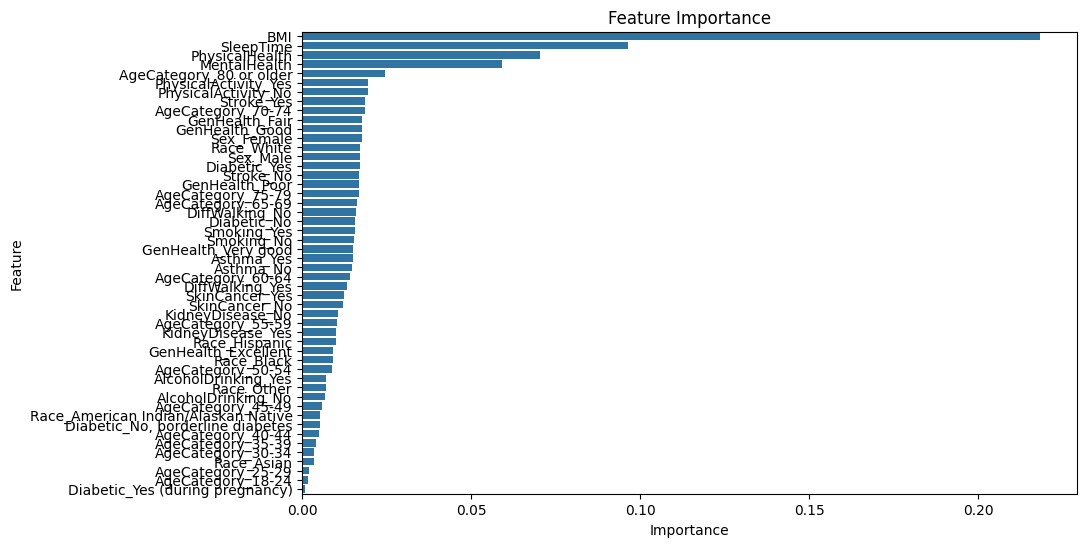

Train Accuracy: 0.9994894703254626
Train Precision: 0.9992816091954023
Train Recall: 0.9949928469241774
Train F1 Score: 0.9971326164874552
Train ROC AUC: 0.9974613898298016


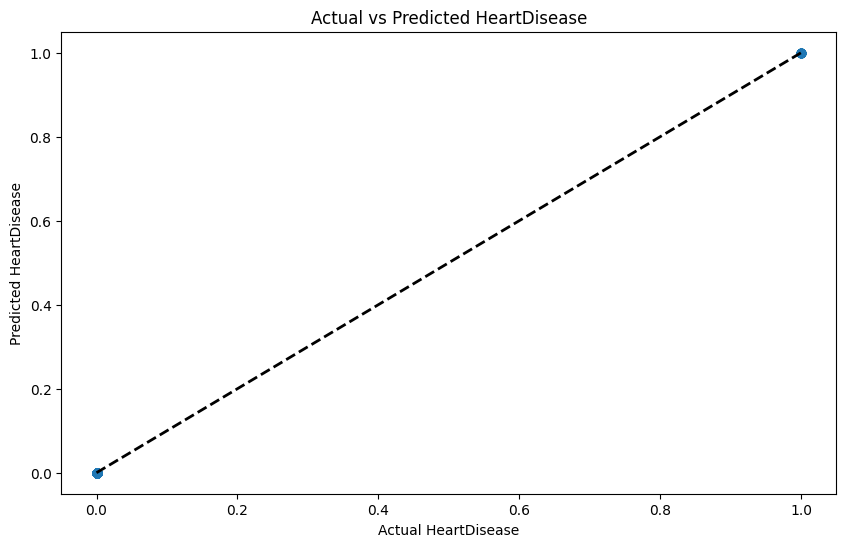

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Уменьшение размера выборки для ускорения работы (опционально)
df = df.sample(frac=0.1, random_state=42)

# Разделение на обучающую и тестовую выборки (например, 70% обучающая, 30% тестовая)
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

# Разделение обучающей выборки на обучающую и контрольную (например, 70% обучающая, 30% контрольная)
train_df, val_df = train_test_split(train_df, test_size=0.3, random_state=42)

# Вывод размеров выборок
print("Размер обучающей выборки:", len(train_df))
print("Размер контрольной выборки:", len(val_df))
print("Размер тестовой выборки:", len(test_df))

# Определение категориальных признаков
categorical_features = [
    'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race',
    'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'
]

# Применение one-hot encoding к обучающей выборке
train_df_encoded = pd.get_dummies(train_df, columns=categorical_features)

# Применение one-hot encoding к контрольной выборке
val_df_encoded = pd.get_dummies(val_df, columns=categorical_features)

# Применение one-hot encoding к тестовой выборке
test_df_encoded = pd.get_dummies(test_df, columns=categorical_features)

# Определение сущностей
es = ft.EntitySet(id='heart_data')
es = es.add_dataframe(dataframe_name='heart', dataframe=train_df_encoded, index='id')

# Генерация признаков с уменьшенной глубиной
feature_matrix, feature_defs = ft.dfs(entityset=es, target_dataframe_name='heart', max_depth=1)

# Преобразование признаков для контрольной и тестовой выборок
val_feature_matrix = ft.calculate_feature_matrix(features=feature_defs, entityset=es, instance_ids=val_df_encoded.index)
test_feature_matrix = ft.calculate_feature_matrix(features=feature_defs, entityset=es, instance_ids=test_df_encoded.index)

# Удаление строк с NaN
feature_matrix = feature_matrix.dropna()
val_feature_matrix = val_feature_matrix.dropna()
test_feature_matrix = test_feature_matrix.dropna()

# Разделение данных на обучающую и тестовую выборки
X_train = feature_matrix.drop('HeartDisease', axis=1)
y_train = feature_matrix['HeartDisease']
X_val = val_feature_matrix.drop('HeartDisease', axis=1)
y_val = val_feature_matrix['HeartDisease']
X_test = test_feature_matrix.drop('HeartDisease', axis=1)
y_test = test_feature_matrix['HeartDisease']

# Выбор модели
model = RandomForestClassifier(random_state=42)

# Обучение модели
model.fit(X_train, y_train)

# Предсказание и оценка
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")

# Кросс-валидация
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
accuracy_cv = scores.mean()
print(f"Cross-validated Accuracy: {accuracy_cv}")

# Анализ важности признаков
feature_importances = model.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

# Проверка на переобучение
y_train_pred = model.predict(X_train)

accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)
roc_auc_train = roc_auc_score(y_train, y_train_pred)

print(f"Train Accuracy: {accuracy_train}")
print(f"Train Precision: {precision_train}")
print(f"Train Recall: {recall_train}")
print(f"Train F1 Score: {f1_train}")
print(f"Train ROC AUC: {roc_auc_train}")

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual HeartDisease')
plt.ylabel('Predicted HeartDisease')
plt.title('Actual vs Predicted HeartDisease')
plt.show()